This notebook tests if the datassets created by the create_waveform_dataset_test.py are working

by Hiroto Bito (hbito@uw.edu)

References:
-  https://github.com/niyiyu/PNW-ML/blob/main/scripts/mpi_extract_comcat_acceleration.py



In [2]:
import os
import logging
from obspy.clients.fdsn import Client
import numpy as np
import obspy
from obspy import Stream
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import pandas as pd
import h5py
from tqdm import tqdm
from itertools import islice
import random
from pnwstore.mseed import WaveformClient

In [3]:
client_waveform = WaveformClient()

## Verify the waveform dataset for EH

Keys in HDF5 file:
 - data
data
<KeysViewHDF5 ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']>
Sample key: 5
(27492, 3, 30000)
Sample waveform index: [10420, 27085, 27263]
(3, 3, 30000)


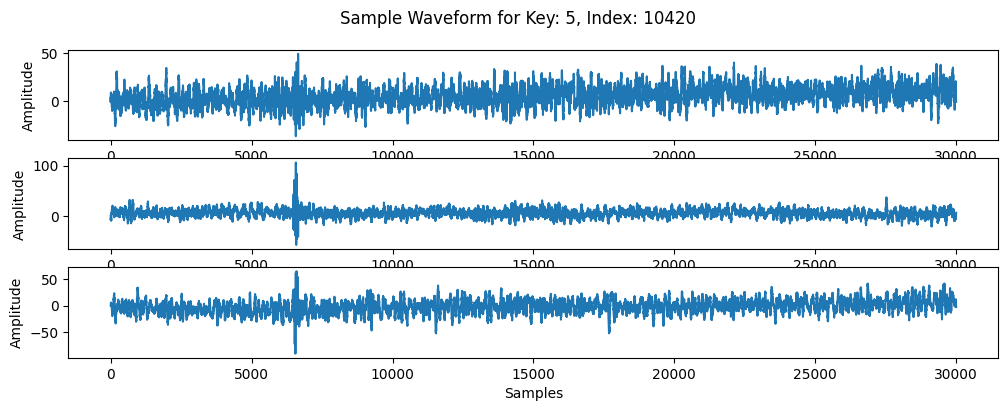

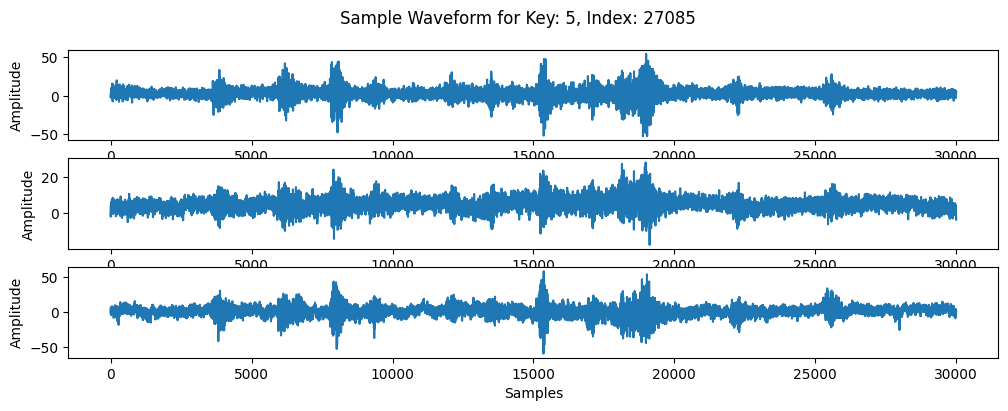

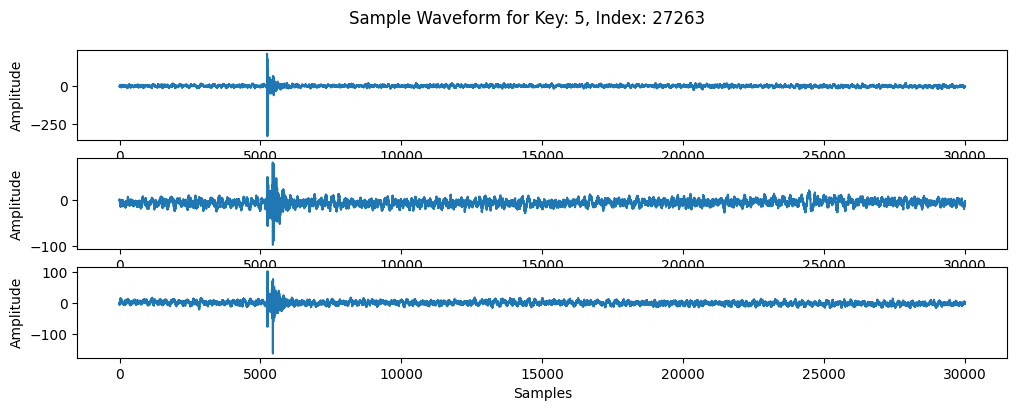

In [14]:
hdf5_test_path = '/wd1/hbito_data/data/datasets_all_regions/waveforms_EH_on_the_fly_bulk2.h5'
with h5py.File(hdf5_test_path, 'r') as f:
    print("Keys in HDF5 file:")
    for key in f.keys():
        print(f" - {key}")
    top_keys = list(f.keys())[0]
    print(top_keys)
    print(f[top_keys].keys())
    

    waveforms_group = f[top_keys]

    # for i, key in enumerate(list(waveforms_group.keys())[:]):
    #             waveform = waveforms_group[key][:]
    #             print(f" - {key}: shape={waveform.shape}, min={waveform.min():.2f}, max={waveform.max():.2f}")

    # Plot a sample waveform if matplotlib is available
    if list(waveforms_group.keys()):
        sample_key = str(np.random.randint(11,size=1).item())
        print(f"Sample key: {sample_key}")
        print(waveforms_group[sample_key].shape)
        idx_sample_waveform = sorted(np.random.randint(waveforms_group[sample_key].shape[0],size=3))
        print(f"Sample waveform index: {idx_sample_waveform}")
        sample_waveform = waveforms_group[sample_key][idx_sample_waveform]
        print(sample_waveform.shape)

        for i in range(sample_waveform.shape[0]):
            fig, ax = plt.subplots(3, 1, figsize=(12, 4))
            y = sample_waveform[i]
            x = np.arange(y.shape[-1])
            for j in range(y.shape[0]):
                ax[j].plot(x, y[j])
                ax[j].set_ylabel("Amplitude")

            ax[-1].set_xlabel("Samples")
            fig.suptitle(f"Sample Waveform for Key: {sample_key}, Index: {idx_sample_waveform[i]}")
        
            plt.show()
        

    

## Verify the metadata for EH

In [16]:
metadata_EH = pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/metadata_EH_on_the_fly_bulk.csv')
print(len(metadata_EH))
metadata_EH.iloc[0:20][['event_id','source_origin_time','source_latitude_deg','source_longitude_deg','source_depth_km','station_network_code','station_channel_code','station_code','station_location_code','station_latitude_deg','station_longitude_deg','station_elevation_m','trace_name','trace_sampling_rate_hz', 'trace_start_time','trace_S_arrival_sample','trace_P_arrival_sample','trace_S_onset','trace_P_onset']]

301533


,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_onset,trace_P_onset
0,ev1262304917_262282,1.262305e+09,47.22533,-122.16895,56.111,UW,EH,PCMD,NaN,NaN,NaN,NaN,"8$0,:3,:30000",100,2010-01-01T00:14:27.262282Z,6601.0,5991.0,impulsive,impulsive
1,ev1262304917_262282,1.262305e+09,47.22533,-122.16895,56.111,UW,EH,RVW,NaN,NaN,NaN,NaN,"3$0,:3,:30000",100,2010-01-01T00:14:27.262282Z,NaN,7057.0,NaN,impulsive
2,ev1262304917_262282,1.262305e+09,47.22533,-122.16895,56.111,PB,EH,B013,NaN,NaN,NaN,NaN,"1$0,:3,:30000",100,2010-01-01T00:14:27.262282Z,7635.0,NaN,impulsive,NaN
3,ev1262304917_262282,1.262305e+09,47.22533,-122.16895,56.111,PB,EH,B943,NaN,NaN,NaN,NaN,"3$1,:3,:30000",100,2010-01-01T00:14:27.262282Z,7650.0,NaN,impulsive,NaN
4,ev1262304917_262282,1.262305e+09,47.22533,-122.16895,56.111,UW,EH,BOW,NaN,NaN,NaN,NaN,"8$1,:3,:30000",100,2010-01-01T00:14:27.262282Z,8079.0,NaN,impulsive,NaN
5,ev1262305009_37536,1.262305e+09,48.19518,-121.77276,3.820,PB,EH,B943,NaN,NaN,NaN,NaN,"3$2,:3,:30000",100,2010-01-01T00:15:59.375360Z,7836.0,6563.0,impulsive,impulsive
6,ev1262305009_37536,1.262305e+09,48.19518,-121.77276,3.820,UW,EH,BLN,NaN,NaN,NaN,NaN,"9$0,:3,:30000",100,2010-01-01T00:15:59.375360Z,7769.0,6564.0,impulsive,impulsive
7,ev1262305009_37536,1.262305e+09,48.19518,-121.77276,3.820,CN,EH,VDB,NaN,NaN,NaN,NaN,"3$3,:3,:30000",100,2010-01-01T00:15:59.375360Z,NaN,6577.0,NaN,impulsive
8,ev1262305009_37536,1.262305e+09,48.19518,-121.77276,3.820,UW,EH,MCW,NaN,NaN,NaN,NaN,"2$0,:3,:30000",100,2010-01-01T00:15:59.375360Z,NaN,6593.0,NaN,impulsive
9,ev1262305009_37536,1.262305e+09,48.19518,-121.77276,3.820,PB,EH,B001,NaN,NaN,NaN,NaN,"6$0,:3,:30000",100,2010-01-01T00:15:59.375360Z,8086.0,6763.0,impulsive,impulsive


## Check the error file

In [17]:
errors_EH = pd.read_csv("/wd1/hbito_data/data/datasets_all_regions/save_errors_EH_on_the_fly_bulk2.csv")
print(len(errors_EH))
errors_EH

1


,i_iter,network,station,starttime,endtime,stage,error
0,165513,CN,VDB,2012-04-24T23:59:08.908738Z,2012-04-25T00:04:08.908738Z,metadata_write,list index out of range


In [7]:
test = client_waveform.get_waveforms(network='7D',station='J10D',location='*',channel='HH?',starttime=obspy.UTCDateTime("2014-11-01T23:59:08.908738Z"), endtime=obspy.UTCDateTime("2014-11-01T23:59:59.999999Z"))
test

3 Trace(s) in Stream:
7D.J10D..HH1 | 2014-11-01T23:59:08.905699Z - 2014-11-01T23:59:59.993696Z | 125.0 Hz, 6387 samples
7D.J10D..HH2 | 2014-11-01T23:59:08.905699Z - 2014-11-01T23:59:59.993696Z | 125.0 Hz, 6387 samples
7D.J10D..HHZ | 2014-11-01T23:59:08.905698Z - 2014-11-01T23:59:59.993695Z | 125.0 Hz, 6387 samples

In [8]:
test[0].stats.channel[-1]

'1'

In [48]:
test2 = client_waveform.get_waveforms(network='CN',station='VDB',location='*',channel='*',starttime=obspy.UTCDateTime("2012-04-25T00:00:00.000000Z"), endtime=obspy.UTCDateTime("2012-04-25T00:04:08.908738Z"))
test2 

0 Trace(s) in Stream:


In [18]:
df_all_picks = pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/all_picks_all_regions_2010_2015_ver3.csv')

In [19]:
df_all_picks.head()

,Unnamed: 0.1,Unnamed: 0,network,station,location,band_inst,label,trace_starttime,trigger_onset,pick_time,trigger_offset,max_prob,thresh_prob,pick_id,station_id
0,0,0,CN,BPBC,NaN,EH,S,2010-01-01T00:00:00.000000Z,2010-01-01T01:09:14.080000Z,2010-01-01T01:09:14.490000Z,2010-01-01T01:09:14.780000Z,0.107859,0.05,0,CN.BPBC.
1,1,1,UW,PNLK,NaN,HH,P,2010-01-01T00:00:00.000000Z,2010-01-01T07:14:59.250000Z,2010-01-01T07:14:59.450000Z,2010-01-01T07:14:59.620000Z,0.070258,0.05,1,UW.PNLK.
2,2,2,UW,PNLK,NaN,HH,P,2010-01-01T00:00:00.000000Z,2010-01-01T07:11:26.410000Z,2010-01-01T07:11:26.720000Z,2010-01-01T07:11:26.940000Z,0.092121,0.05,2,UW.PNLK.
3,3,3,UW,PNLK,NaN,HH,P,2010-01-01T00:00:00.000000Z,2010-01-01T07:01:34.800000Z,2010-01-01T07:01:35.140000Z,2010-01-01T07:01:35.730000Z,0.240941,0.05,3,UW.PNLK.
4,4,4,UW,PNLK,NaN,HH,P,2010-01-01T00:00:00.000000Z,2010-01-01T06:44:40.110000Z,2010-01-01T06:44:40.280000Z,2010-01-01T06:44:40.410000Z,0.062073,0.05,4,UW.PNLK.


In [13]:
check_pick_existence = df_all_picks.loc[(df_all_picks['network'] == 'UW') & (df_all_picks['station'] == 'SQM')&(df_all_picks['trace_starttime']>obspy.UTCDateTime("2011-04-22T22:59:08.908738Z"))&(df_all_picks['trace_starttime']<obspy.UTCDateTime("2011-07-01T23:59:59.999999Z"))]
check_pick_existence

,Unnamed: 0.1,Unnamed: 0,network,station,location,band_inst,label,trace_starttime,trigger_onset,pick_time,trigger_offset,max_prob,thresh_prob,pick_id,station_id
5062035,5062035,5062035,UW,SQM,NaN,EH,S,2011-04-23T00:00:00.000000Z,2011-04-23T22:52:57.370000Z,2011-04-23T22:52:57.510000Z,2011-04-23T22:52:57.710000Z,0.057792,0.05,5062035,UW.SQM.
5062689,5062689,5062689,UW,SQM,NaN,EH,S,2011-04-23T00:00:00.000000Z,2011-04-23T13:23:02.900000Z,2011-04-23T13:23:02.980000Z,2011-04-23T13:23:03.050000Z,0.053815,0.05,5062689,UW.SQM.
5062690,5062690,5062690,UW,SQM,NaN,EH,S,2011-04-23T00:00:00.000000Z,2011-04-23T13:19:53.430000Z,2011-04-23T13:19:53.600000Z,2011-04-23T13:19:53.880000Z,0.059104,0.05,5062690,UW.SQM.
5062691,5062691,5062691,UW,SQM,NaN,EH,S,2011-04-23T00:00:00.000000Z,2011-04-23T12:36:59.910000Z,2011-04-23T12:36:59.970000Z,2011-04-23T12:37:00.060000Z,0.051836,0.05,5062691,UW.SQM.
5062692,5062692,5062692,UW,SQM,NaN,EH,S,2011-04-23T00:00:00.000000Z,2011-04-23T12:09:11.240000Z,2011-04-23T12:09:11.370000Z,2011-04-23T12:09:11.460000Z,0.055802,0.05,5062692,UW.SQM.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779588,5779588,5779588,UW,SQM,NaN,EH,P,2011-06-30T00:00:00.000000Z,2011-06-30T21:46:28.860000Z,2011-06-30T21:46:29.100000Z,2011-06-30T21:46:29.290000Z,0.077404,0.05,5779588,UW.SQM.
5779589,5779589,5779589,UW,SQM,NaN,EH,P,2011-06-30T00:00:00.000000Z,2011-06-30T22:42:56.340000Z,2011-06-30T22:42:56.570000Z,2011-06-30T22:42:56.780000Z,0.077862,0.05,5779589,UW.SQM.
5779590,5779590,5779590,UW,SQM,NaN,EH,P,2011-06-30T00:00:00.000000Z,2011-06-30T22:44:28.500000Z,2011-06-30T22:44:28.580000Z,2011-06-30T22:44:28.640000Z,0.051976,0.05,5779590,UW.SQM.
5779591,5779591,5779591,UW,SQM,NaN,EH,P,2011-06-30T00:00:00.000000Z,2011-06-30T23:07:37.260000Z,2011-06-30T23:07:37.440000Z,2011-06-30T23:07:37.560000Z,0.062194,0.05,5779591,UW.SQM.


In [15]:
check_pick_existence.loc[check_pick_existence['band_inst'] != 'EH']

,Unnamed: 0.1,Unnamed: 0,network,station,location,band_inst,label,trace_starttime,trigger_onset,pick_time,trigger_offset,max_prob,thresh_prob,pick_id,station_id
5067199,5067199,5067199,UW,SQM,NaN,NaN,S,2011-04-23T00:00:00.006000Z,,2011-04-23T00:15:29.006000Z,NaN,NaN,NaN,5067199,UW.SQM.
5067200,5067200,5067200,UW,SQM,NaN,NaN,P,2011-04-23T00:00:00.006000Z,,2011-04-23T16:24:31.726000Z,NaN,NaN,NaN,5067200,UW.SQM.
5067201,5067201,5067201,UW,SQM,NaN,NaN,P,2011-04-23T00:00:00.006000Z,,2011-04-23T22:57:49.006000Z,NaN,NaN,NaN,5067201,UW.SQM.
5067202,5067202,5067202,UW,SQM,NaN,NaN,P,2011-04-23T00:00:00.006000Z,,2011-04-23T13:44:46.946000Z,NaN,NaN,NaN,5067202,UW.SQM.
5067203,5067203,5067203,UW,SQM,NaN,NaN,P,2011-04-23T00:00:00.006000Z,,2011-04-23T12:06:56.406000Z,NaN,NaN,NaN,5067203,UW.SQM.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5768061,5768061,5768061,UW,SQM,NaN,NaN,S,2011-06-29T00:00:00.006000Z,,2011-06-29T08:23:02.266000Z,NaN,NaN,NaN,5768061,UW.SQM.
5768062,5768062,5768062,UW,SQM,NaN,NaN,S,2011-06-29T00:00:00.006000Z,,2011-06-29T10:26:10.426000Z,NaN,NaN,NaN,5768062,UW.SQM.
5768063,5768063,5768063,UW,SQM,NaN,NaN,S,2011-06-29T00:00:00.006000Z,,2011-06-29T03:01:00.366000Z,NaN,NaN,NaN,5768063,UW.SQM.
5768064,5768064,5768064,UW,SQM,NaN,NaN,P,2011-06-29T00:00:00.006000Z,,2011-06-29T11:47:57.626000Z,NaN,NaN,NaN,5768064,UW.SQM.


In [55]:
len(metadata)+len(errors)

301534

In [3]:
metadata_HH_BH =  pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/metadata_HH_BH_on_the_fly_bulk.csv')

In [4]:
def find_matching_rows_merge(df1, df2, columns_to_match):
    """
    Find matching rows between two dataframes using merge
    
    Parameters:
    df1, df2: DataFrames to compare
    columns_to_match: list of column names to match on
    """
    # Inner join to find matches
    matches = df1.merge(df2, on=columns_to_match, how='inner', suffixes=('_df1', '_df2'))
    return matches

In [6]:
matched_rows = find_matching_rows_merge(metadata_HH_BH, metadata_EH, ['event_id', 'station_network_code', 'station_code'])

In [7]:
matched_rows.keys()

Index(['event_id', 'source_origin_time_df1', 'source_latitude_deg_df1',
       'source_longitude_deg_df1', 'source_type_df1', 'source_depth_km_df1',
       'preferred_source_magnitude_df1', 'preferred_source_magnitude_type_df1',
       'preferred_source_magnitude_uncertainty_df1',
       'source_depth_uncertainty_km_df1',
       'source_horizontal_uncertainty_km_df1', 'station_network_code',
       'station_channel_code_df1', 'station_code', 'station_location_code_df1',
       'station_latitude_deg_df1', 'station_longitude_deg_df1',
       'station_elevation_m_df1', 'trace_name_df1',
       'trace_sampling_rate_hz_df1', 'trace_start_time_df1',
       'trace_S_arrival_sample_df1', 'trace_P_arrival_sample_df1',
       'trace_S_arrival_uncertainty_s_df1',
       'trace_P_arrival_uncertainty_s_df1', 'trace_P_polarity_df1',
       'trace_S_onset_df1', 'trace_P_onset_df1', 'trace_snr_db_df1',
       'source_type_pnsn_label_df1', 'source_local_magnitude_df1',
       'source_local_magnitude_un

In [11]:
matched_rows[['event_id', 'station_network_code', 'station_code', 'trace_name_df1', 'trace_name_df2','trace_start_time_df1','trace_start_time_df2']]

,event_id,station_network_code,station_code,trace_name_df1,trace_name_df2,trace_start_time_df1,trace_start_time_df2
0,ev1303575795_458668,UW,SQM,"7$707,:3,:30000","9$8472,:3,:30000",2011-04-23T16:22:25.458668Z,2011-04-23T16:22:25.458668Z
1,ev1303602881_842239,UW,SQM,"0$744,:3,:30000","1$8481,:3,:30000",2011-04-23T23:53:51.842239Z,2011-04-23T23:53:51.842239Z
2,ev1303979488_607052,UW,SQM,"4$691,:3,:30000","0$8678,:3,:30000",2011-04-28T08:30:38.607052Z,2011-04-28T08:30:38.607052Z
3,ev1304028931_735132,UW,SQM,"9$763,:3,:30000","7$8571,:3,:30000",2011-04-28T22:14:41.735132Z,2011-04-28T22:14:41.735132Z
4,ev1304248660_218891,UW,SQM,"10$684,:3,:30000","0$8744,:3,:30000",2011-05-01T11:16:50.218891Z,2011-05-01T11:16:50.218891Z
5,ev1304449438_720237,UW,SQM,"6$736,:3,:30000","4$8849,:3,:30000",2011-05-03T19:03:08.720237Z,2011-05-03T19:03:08.720237Z
6,ev1304502004_078151,UW,SQM,"1$738,:3,:30000","6$8829,:3,:30000",2011-05-04T09:39:14.078151Z,2011-05-04T09:39:14.078151Z
7,ev1304666925_141583,UW,SQM,"9$800,:3,:30000","10$8847,:3,:30000",2011-05-06T07:27:55.141583Z,2011-05-06T07:27:55.141583Z
8,ev1304744257_776283,UW,SQM,"8$736,:3,:30000","5$8850,:3,:30000",2011-05-07T04:56:47.776283Z,2011-05-07T04:56:47.776283Z
9,ev1304759795_931709,UW,SQM,"10$710,:3,:30000","7$8700,:3,:30000",2011-05-07T09:15:45.931709Z,2011-05-07T09:15:45.931709Z


In [17]:
errors_HH_BH = pd.read_csv("/wd1/hbito_data/data/datasets_all_regions/save_errors_on_the_fly_bulk.csv")
print(len(errors_HH_BH))
errors_HH_BH

52


,i_iter,network,station,starttime,endtime,stage,error
0,36044,CN,VGZ,2012-04-24T23:59:08.908738Z,2012-04-25T00:04:08.908738Z,metadata_write,list index out of range
1,36045,CN,SNB,2012-04-24T23:59:08.908738Z,2012-04-25T00:04:08.908738Z,metadata_write,list index out of range
2,36046,CN,PFB,2012-04-24T23:59:08.908738Z,2012-04-25T00:04:08.908738Z,metadata_write,list index out of range
3,36047,CN,LZB,2012-04-24T23:59:08.908738Z,2012-04-25T00:04:08.908738Z,metadata_write,list index out of range
4,53481,TA,L02D,2012-08-19T02:42:41.651371Z,2012-08-19T02:47:41.651371Z,metadata_write,list index out of range
5,53494,TA,L02D,2012-08-19T05:46:21.222168Z,2012-08-19T05:51:21.222168Z,metadata_write,list index out of range
6,53547,TA,L02D,2012-08-19T08:06:46.821690Z,2012-08-19T08:11:46.821690Z,metadata_write,list index out of range
7,71604,TA,L02E,2012-10-11T02:26:26.015123Z,2012-10-11T02:31:26.015123Z,metadata_write,list index out of range
8,71677,TA,L02E,2012-10-11T06:48:48.648782Z,2012-10-11T06:53:48.648782Z,metadata_write,list index out of range
9,71734,TA,L02E,2012-10-11T06:54:24.664528Z,2012-10-11T06:59:24.664528Z,metadata_write,list index out of range


In [28]:
errors_HH_BH_ns_st_et = errors_HH_BH[['network', 'station', 'starttime']]
errors_HH_BH_ns_st_et.rename(columns={'starttime': 'trace_start_time'}, inplace=True)
errors_HH_BH_ns_st_et

/tmp/ipykernel_1663932/645403278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_HH_BH_ns_st_et.rename(columns={'starttime': 'trace_start_time'}, inplace=True)


,network,station,trace_start_time
0,CN,VGZ,2012-04-24T23:59:08.908738Z
1,CN,SNB,2012-04-24T23:59:08.908738Z
2,CN,PFB,2012-04-24T23:59:08.908738Z
3,CN,LZB,2012-04-24T23:59:08.908738Z
4,TA,L02D,2012-08-19T02:42:41.651371Z
5,TA,L02D,2012-08-19T05:46:21.222168Z
6,TA,L02D,2012-08-19T08:06:46.821690Z
7,TA,L02E,2012-10-11T02:26:26.015123Z
8,TA,L02E,2012-10-11T06:48:48.648782Z
9,TA,L02E,2012-10-11T06:54:24.664528Z


In [29]:
errors_EH_ns_st_et = errors_EH[['network', 'station', 'starttime']]
errors_EH_ns_st_et.rename(columns={'starttime': 'trace_start_time'}, inplace=True)
errors_EH_ns_st_et

/tmp/ipykernel_1663932/3793372232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_EH_ns_st_et.rename(columns={'starttime': 'trace_start_time'}, inplace=True)


,network,station,trace_start_time
0,CN,VDB,2012-04-24T23:59:08.908738Z


In [32]:
metadata_HH_BH_ns_st_et = metadata_HH_BH[['station_network_code', 'station_code', 'trace_start_time']]
metadata_HH_BH_ns_st_et.rename(columns={'station_network_code': 'network', 'station_code': 'station'}, inplace=True)
metadata_HH_BH_ns_st_et

/tmp/ipykernel_1663932/1839549633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_HH_BH_ns_st_et.rename(columns={'station_network_code': 'network', 'station_code': 'station'}, inplace=True)


,network,station,trace_start_time
0,UW,GNW,2010-01-01T00:14:27.262282Z
1,UW,PASS,2010-01-01T00:15:59.375360Z
2,CN,HNB,2010-01-01T00:15:59.375360Z
3,UW,GNW,2010-01-01T00:15:59.375360Z
4,UW,GNW,2010-01-01T07:17:13.689209Z
...,...,...,...
388942,7D,J11D,2015-06-23T23:17:28.841147Z
388943,7D,J19D,2015-06-23T23:17:28.841147Z
388944,7D,J10D,2015-06-23T23:17:28.841147Z
388945,7D,J27D,2015-06-23T23:17:28.841147Z


In [34]:
metadata_EH_ns_st_et = metadata_EH[['station_network_code', 'station_code', 'trace_start_time']]
metadata_EH_ns_st_et.rename(columns={'station_network_code': 'network', 'station_code': 'station'}, inplace=True)
metadata_EH_ns_st_et

/tmp/ipykernel_1663932/1088979131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_EH_ns_st_et.rename(columns={'station_network_code': 'network', 'station_code': 'station'}, inplace=True)


,network,station,trace_start_time
0,UW,PCMD,2010-01-01T00:14:27.262282Z
1,UW,RVW,2010-01-01T00:14:27.262282Z
2,PB,B013,2010-01-01T00:14:27.262282Z
3,PB,B943,2010-01-01T00:14:27.262282Z
4,UW,BOW,2010-01-01T00:14:27.262282Z
...,...,...,...
301528,UW,MCW,2015-06-23T18:31:31.918122Z
301529,CN,GOBB,2015-06-23T18:31:31.918122Z
301530,CN,GOBB,2015-06-23T18:54:39.206032Z
301531,PB,B011,2015-06-23T19:00:04.379690Z


In [42]:
## Explicitly specify axis=0 for vertical concatenation
df_concat = pd.concat([metadata_HH_BH_ns_st_et, metadata_EH_ns_st_et, errors_HH_BH_ns_st_et, errors_EH_ns_st_et], axis=0)

In [43]:
df_concat

,network,station,trace_start_time
0,UW,GNW,2010-01-01T00:14:27.262282Z
1,UW,PASS,2010-01-01T00:15:59.375360Z
2,CN,HNB,2010-01-01T00:15:59.375360Z
3,UW,GNW,2010-01-01T00:15:59.375360Z
4,UW,GNW,2010-01-01T07:17:13.689209Z
...,...,...,...
48,NC,KCT,2015-02-21T20:18:28.766504Z
49,NC,KCT,2015-04-14T15:16:00.706372Z
50,NC,KCT,2015-04-19T10:28:31.994688Z
51,NC,KCT,2015-05-01T14:01:14.672253Z


In [44]:
df_concat_unique = df_concat.drop_duplicates(subset=['network', 'station', 'trace_start_time'])
df_concat_unique

,network,station,trace_start_time
0,UW,GNW,2010-01-01T00:14:27.262282Z
1,UW,PASS,2010-01-01T00:15:59.375360Z
2,CN,HNB,2010-01-01T00:15:59.375360Z
3,UW,GNW,2010-01-01T00:15:59.375360Z
4,UW,GNW,2010-01-01T07:17:13.689209Z
...,...,...,...
48,NC,KCT,2015-02-21T20:18:28.766504Z
49,NC,KCT,2015-04-14T15:16:00.706372Z
50,NC,KCT,2015-04-19T10:28:31.994688Z
51,NC,KCT,2015-05-01T14:01:14.672253Z


In [45]:
df_concat_unique


,network,station,trace_start_time
0,UW,GNW,2010-01-01T00:14:27.262282Z
1,UW,PASS,2010-01-01T00:15:59.375360Z
2,CN,HNB,2010-01-01T00:15:59.375360Z
3,UW,GNW,2010-01-01T00:15:59.375360Z
4,UW,GNW,2010-01-01T07:17:13.689209Z
...,...,...,...
48,NC,KCT,2015-02-21T20:18:28.766504Z
49,NC,KCT,2015-04-14T15:16:00.706372Z
50,NC,KCT,2015-04-19T10:28:31.994688Z
51,NC,KCT,2015-05-01T14:01:14.672253Z


In [47]:
# Find only the duplicate rows (excluding the first occurrence)
duplicates_only = df_concat[df_concat.duplicated(subset=['network', 'station', 'trace_start_time'], keep='first')]
print(f"Duplicate rows (excluding first): {len(duplicates_only)}")
duplicates_only

Duplicate rows (excluding first): 50


,network,station,trace_start_time
93950,UW,SQM,2011-04-23T16:22:25.458668Z
94074,UW,SQM,2011-04-23T23:53:51.842239Z
94857,UW,SQM,2011-04-28T08:30:38.607052Z
95073,UW,SQM,2011-04-28T22:14:41.735132Z
95503,UW,SQM,2011-05-01T11:16:50.218891Z
95888,UW,SQM,2011-05-03T19:03:08.720237Z
96030,UW,SQM,2011-05-04T09:39:14.078151Z
96438,UW,SQM,2011-05-06T07:27:55.141583Z
96578,UW,SQM,2011-05-07T04:56:47.776283Z
96608,UW,SQM,2011-05-07T09:15:45.931709Z
